<a href="https://colab.research.google.com/github/soumyadeepdutta/100CodingProblem/blob/main/image_restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Scripts

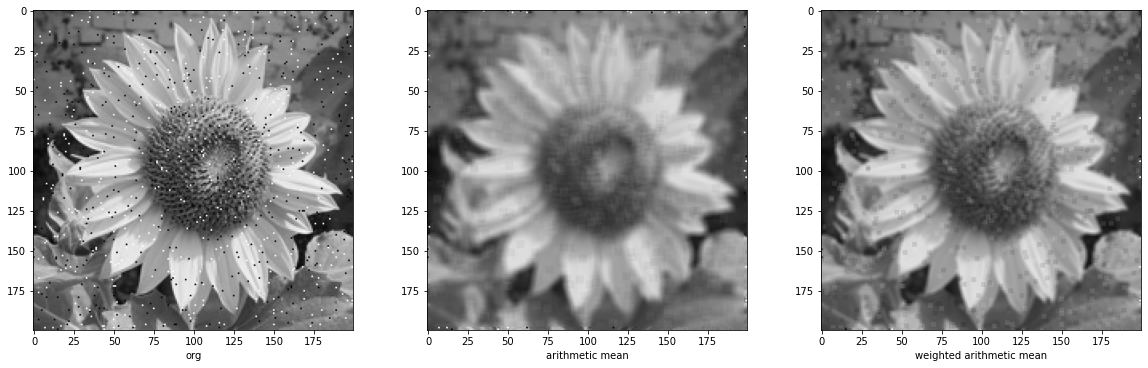

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

# Salt and pepper noise
def add_spnoise(img):
  
    # Getting the dimensions of the image
  row , col = img.shape
  number_of_pixels = (row * col)*1//100 # 1% noisy pixel
  for i in range(number_of_pixels):
        
      # Extreme white
      y_coord_w=random.randint(0, row - 1)
      x_coord_w=random.randint(0, col - 1)
      img[y_coord_w][x_coord_w] = 255

      # Extreme dark
      y_coord_b=random.randint(0, row - 1)
      x_coord_b=random.randint(0, col - 1)
      img[y_coord_b][x_coord_b] = 0
          
  return img

def mean_filtering(im):
    img = np.ndarray.copy(im)
    w = 2

    for i in range(2, im.shape[0]-2):
        for j in range(2, im.shape[1]-2):
            # print(f'Modifying {i, j}')
            block = im[i-w:i+w+1, j-w:j+w+1]
            m = np.mean(block, dtype=np.float32)
            img[i][j] = int(m)

    return img

# returns arithmetic mean after modifying the most white or dark pixels
def weighted_mean(block, tolerance):
    # for each block 
    for i in range(block.shape[0]):
        for j in range(block.shape[1]):
          # if pixel value 0, add tolerance weight
            if block[i][j] == 0:
                block[i][j] += tolerance
           # if pixel value 255, remove tolerance weight
            elif block[i][j] == 255:
                block[i][j] -= tolerance
    return np.mean(block, dtype=np.float32)


def weighted_mean_filtering(im):
    img = np.ndarray.copy(im)

    # k is the kernel size
    # k = how many pixel to consider on each side
    # k = 1 means 1 pixel on each side results a 3x3 matrix
    # ___|___|___
    # ___|___|___
    #    |   |

    k = 1 

    # for each pixel in the image
    for i in range(k, im.shape[0]-k):
        for j in range(k, im.shape[1]-k):

            # create a kernel of provided size
            block = im[i-k:i+k+1, j-k:j+k+1]

            # calculated weighted mean
            m = weighted_mean(block, 10)

            # replace existing value with weighted mean
            img[i][j] = int(m)

    return img


if __name__ == "__main__":

    # image_file = files.upload()
    # print(type(image_file))
    # adding salt pepper noise in an image
    source = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)
    sp_noisy = add_spnoise(source)
    mean_filtered = mean_filtering(sp_noisy)
    weighted_mean_filtered = weighted_mean_filtering(sp_noisy)

    # view
    plt.figure(figsize=(20, 20))
    plt.subplot(331)
    plt.xlabel('org')
    plt.imshow(source, cmap=plt.cm.gray)

    plt.subplot(332)
    plt.xlabel('arithmetic mean')
    plt.imshow(mean_filtered, cmap=plt.cm.gray)

    plt.subplot(333)
    plt.xlabel('weighted arithmetic mean')
    plt.imshow(weighted_mean_filtered, cmap=plt.cm.gray)

    plt.show()